# Product recommendation engine
---
![](resources/groceries.jpg)

## Main objective:
---
Imagine we are a grocery store owner, and we are trying to maximize the purchases of our customers per visit. 

A first strategy that comes to our mind is placing products next to each other that are usually bought together.

Since we have succesfully completed a Data Science task in the past we immediately realize that this problem can be formulated as a recommendation task.


The machine learning part has the following goal:


Essentially we will try to predict the last item of a customers purchase list, given all the other items that he has already in his shopping basket. Those predictions are a helpful first heuristic for the placement of certain products in our grocery store. 

Thus we start collecting the purchase histories of past customers and start writing down the following steps needed, to build our recommendation pipeline:


### Plan of attack:
1. Load the customer purchase data, located in 'data/training_data.csv', 'data/training_labels.csv'
    - Note on the dataset: Each row in each of the data files refers to one 'incomplete' item-list of a customers purchase.
    - The labels represent the item that was purchased by the customer in addition to the items in the dataset
    
    
2. Plot the following statistics on the joined datasets(train_x + train_y):
    - histogram of 10 most purchased products
    - pie chart of all product purchase frequencies
    - which other interesting plots can you think of ? -> extra points


3. Compute and present the following results on joined data sets, train_x + train_y(you are free to choose any method to present your results):
    - Find the pair of products, that are bought together the most
    - How many customers purchased all the products 
    - Which product was the least purchased ?


4. Transform it into a Machine learning-classifier digestable format:
    - Machine learning algorithms consume data, that has a unified format!
    - For example it should look like that:
    
    
    | feature 1(e.g. product/grocery): | feature 2: | ... | feature N: |
    | "apple"                          | "banana"   | ... | mango      |
    --------------------------------------------------------------------
    | no                               | yes        | ... | no         | <- customer 1: purchased only banana 
    --------------------------------------------------------------------
    | yes                              | yes        | ... | yes        | <- customer 2: purchased all 3 shown
    -------------------------------------------------------------------- 
                                .
                                .
                                .
    --------------------------------------------------------------------
    | no                              | no         | ... | no          | <- customer N: purchased nothing
    --------------------------------------------------------------------
    


5. Train your model on the training set(=train_x, train_y), and predict an item for the each row in the test set(=test_x).DON'T change the order of the test set:
    - Item-predictions should be in the original string format(=item name)
    - You can predict numerical values and then convert them back into strings

6. Save the predictions(=string representations) for the test set in a csv-file


### Note on implementation:
- You are free to use any classification algorithm that you want. If you find better recommendation approaches on the web(there certainly are better, but also more involved ones), you are free to use those.
- Some proven algorithms, other than the ones learned in the lectures are: 
    - https://towardsdatascience.com/intro-to-recommender-system-collaborative-filtering-64a238194a26
    - https://towardsdatascience.com/prototyping-a-recommender-system-step-by-step-part-1-knn-item-based-collaborative-filtering-637969614ea

### Note on grading:
- End result on the classification task = 25%
- Clean code(e.g. classes instead of script like functions etc.) = 25 %
- Documentation = 25%
- Usage of numpy, pandas, pyplot etc. functions for faster computation = 25%

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Attack1

In [2]:
train_x = pd.read_csv('data/training_data.csv', header=None)
test_x = pd.read_csv('data/test_data.csv', header=None)
train_y = pd.read_csv('data/training_labels.csv', header=None)

In [3]:
train_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,salmon,vegetables mix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,toothpaste,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,herb & pepper,shrimp,milk,spinach,cake,chili,green tea,light mayo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train_y.head()

,0
0,green tea
1,whole wheat pasta
2,hot dogs
3,cooking oil
4,pickles


# OOP style solution

## Documentation for class Engine
### class variables - all are private
    self.__data : dataframe subject to statistic analysis, Necessary before running prediction model(for creating numerical labels)
    self.__model : model for predictions
    self.__product_count : modification of self.data. Dataframe with rows showing products, columns showing occurence of that product
    self.__comb_count : modification of self. data. Dataframe with rows showing possible product combinations(occuring in same purchase) and clolumns showing their count
    self.__labels : list of possible products names(labels) sorted in alphabetic order
    
### class methods descriptions
    __init__ : initialize Engine object with data and model.
    __update : private update function after change in self.data. Creates proper derivatives of self.data after self.data is modified
    head : returns certain number of top/least occuring products/combinations of product. n, comb, and top arguments specify functionality
    plot : plots ceratin number of top/least occuring products in ceratin plot format. n, top, and name arguments specify functionality
    >> supported plots : pie, bar(product count/combination count), heatmap, network graph(edges as combination, nodes as product)
    top : returns top/least element of occuring products/combinations of product
    format_x : 'formats' given value to unified format for training/prediction in model. rows are customers and columns correspond to each product in self.__lables
    format_y : 'formats' given labels to numerical form(simply index) corresponding to self.__labels
    fit : simplys calls fit function for self.__model. Can take both formatted/non formatted form. Shuffles data by default
    predict : simplys calls predict function for self.__model. Can return in both numerical or string(name of product) format
    get_count, get_data, get_labels : accessor function for private variables
    set_count, set_data, set_model : modifier function for private variables
    __make_model : private model creation functions. Being called when model name(in string) is given and creates proper self.__model.
    >> supported models : DecisionTree, LogisticRegression, KNN, fully connected neural net
    to_csv : simply puts given list of predicted elements into csv file format with given name. Can specifiy name of columns with argument.

In [5]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import torch
import seaborn as sns

class Engine:
    
    def __init__(self, data=None, model='DecisionTree'):
        self.__data = data
        self.__update()
        self.__model = self.__make_model(model)
    
    def __update(self):
        if self.__data is not None:
            mlist = [[e.strip() for e in pd.Series(x).dropna().tolist()] for x in self.__data.values.tolist()]
            mlist_lin = [e.strip() for e in pd.Series(self.__data.values.flatten().tolist()).dropna().tolist()]
            p_count = {x:mlist_lin.count(x) for x in set(mlist_lin)}
            self.__product_count = pd.DataFrame.from_dict(p_count, orient='index', columns=['count'])
            clist = []
            for l in mlist:
                l.sort()
                clist = clist + list(combinations(l, 2))
            c_count = {x:clist.count(x) for x in set(clist)}
            self.__comb_count = pd.DataFrame.from_dict(c_count, orient='index', columns=['count'])
            self.__labels = list(self.__product_count.index)
            self.__labels.sort()
    
    def head(self, n=10, least=False, comb=False):
        if comb:
            return self.__comb_count.sort_values(by='count', ascending=least)[:n]
        else:
            return self.__product_count.sort_values(by='count', ascending=least)[:n]
    
    def plot(self, n=10, least=False, name='pie'):
        if name=='pie':
            return self.head(n).plot.pie(y='count', figsize=(10,10))
        if name=='heatmap':
            num = len(self.__labels)
            df = pd.DataFrame(np.zeros((num, num)), columns=self.__labels, index=self.__labels)
            for index, row in self.__comb_count.iterrows():
                a, b = index
                df.loc[a, b] = list(row)[0]
                df.loc[b, a] = df.loc[a, b]
            return sns.heatmap(df.corr())
        if name=='network':
            G = nx.Graph()
            for index, row in self.__comb_count.iterrows():
                G.add_edge(index[0], index[1], weight=list(row)[0])
            return nx.draw_spring(G, with_labels=True,node_size=30 ,font_size=8)
        if name=='bar':
            return self.head(n).plot.bar(y='count', figsize=(10,10))
        if name=='comb bar':
            return self.head(n, comb=True).plot.bar(y='count', figsize=(10,10))
    
    def top(self, least=False, comb=False):
        if comb:
            if least:
                return self.__comb_count.loc[self.__comb_count.idxmin()]
            else:
                return self.__comb_count.loc[self.__comb_count.idxmax()]
        else:
            if least:
                return self.__product_count.loc[self.__product_count.idxmin()]
            else:
                return self.__product_count.loc[self.__product_count.idxmax()]
    
    def format_x(self, x):
        num = len(self.__labels)
        train_format = np.zeros((len(x), num))
        for index, row in x.iterrows():
            l = list(row.dropna())
            for e in l:
                train_format[index, self.__labels.index(e.strip())] = 1
        return train_format
        
    def format_y(self, y):
        train_label = []
        for index, row in y.iterrows():
            train_label.append(self.__labels.index(row[0].strip()))
        return train_label
        
    def fit(self, X, y, formatted=True, shuffle=True):
        if not formatted:
            if shuffle:
                idx = np.random.permutation(X.index)
                X.reindex(idx)
                y.reindex(idx)
            X = self.format_x(X)
            y = self.format_y(y)
        
        #corresponds to training loop of neural net
        if isinstance(self.__model, NeuralNet):
            X = [[row] for row in X.astype(int)]
            y = np.array(y)
            train = torch.utils.data.TensorDataset(torch.Tensor(X), torch.Tensor(y))
            train_loader = torch.utils.data.DataLoader(train, batch_size=16, shuffle=True)
            
            optimizer = torch.optim.SGD(params=self.__model.parameters(), lr=0.01)
            loss_fn = torch.nn.CrossEntropyLoss()
            
            for epoch in range(10):
                for i, (p,q) in enumerate(train_loader, 1):
                    optimizer.zero_grad()
                    predictions = self.__model.forward(p)
                    loss_fn(predictions, q.long()).backward()
                    optimizer.step()
        else:
            self.__model.fit(X, y)
    
    def predict(self, x, formatted=True, tostring=False):
        if not formatted:
            x = self.format_x(x)
        if isinstance(self.__model, NeuralNet):
            pred = []
            with torch.no_grad():
                x = [[row] for row in x.astype(int)]
                test = torch.utils.data.TensorDataset(torch.Tensor(x))
                test_loader = torch.utils.data.DataLoader(test, batch_size=16)
                for data in test_loader:
                    outputs = self.__model(data[0])
                    _, predicted = torch.max(outputs.data, 1)
                    pred = pred + predicted.tolist()
        else:
            pred = self.__model.predict(x) 
        if tostring:
            pred = [self.__labels[e] for e in list(pred)]
        return pred
    
    def get_count(self, comb=False):
        if comb:
            return self.__comb_count
        else:
            return self.__product_count
    
    def set_data(self, data):
        self.__data = data
        self.__update()
    
    def get_data(self):
        return self.__data
    
    def get_labels(self):
        return self.__labels
    
    def __make_model(self, model):
        if model=='DecisionTree':
            return DecisionTreeClassifier()
        if model =='Logistic':
            return LogisticRegression()
        if model=='KNN':
            return KNeighborsClassifier(n_neighbors=7, metric='cosine', algorithm='brute', n_jobs=-1)
        if model=='Neural':
            return NeuralNet(len(self.__labels), len(self.__labels))
        else:
            return None
        
    def set_model(self, model):
        self.__model = self.__make_model(model)
        
    def to_csv(self, name, pred, columns=['prediction']):
        pd.DataFrame(pred, columns=columns).to_csv(name+'.csv', index=False)
            

## Neural net class for prediction model

In [6]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_dim, num_classes):
        super(NeuralNet, self).__init__()
        
        self.input_dim = input_dim
        self.num_classes = num_classes
        
        self.linear_layer1 = torch.nn.Linear(self.input_dim, 200)
        self.linear_layer2 = torch.nn.Linear(200, 400)
        self.linear_layer3 = torch.nn.Linear(400, 800)
        self.linear_layer4 = torch.nn.Linear(800, self.num_classes)
        
    def forward(self, x):
        x = self.linear_layer1(x.view(-1, self.input_dim))
        x = torch.sigmoid(x)
        
        x = self.linear_layer2(x)
        x = torch.sigmoid(x)
        
        x = self.linear_layer3(x)
        x = torch.sigmoid(x)
        
        x = self.linear_layer4(x)
        x = torch.sigmoid(x)
        
        return x

In [7]:
#example case
example = Engine(data=train_x.join(train_y.rename(columns={0:19})))

In [8]:
example.head()

,count
mineral water,1602
eggs,1214
spaghetti,1164
french fries,1153
chocolate,1100
green tea,905
milk,858
ground beef,659
frozen vegetables,647
pancakes,624


### Attack2

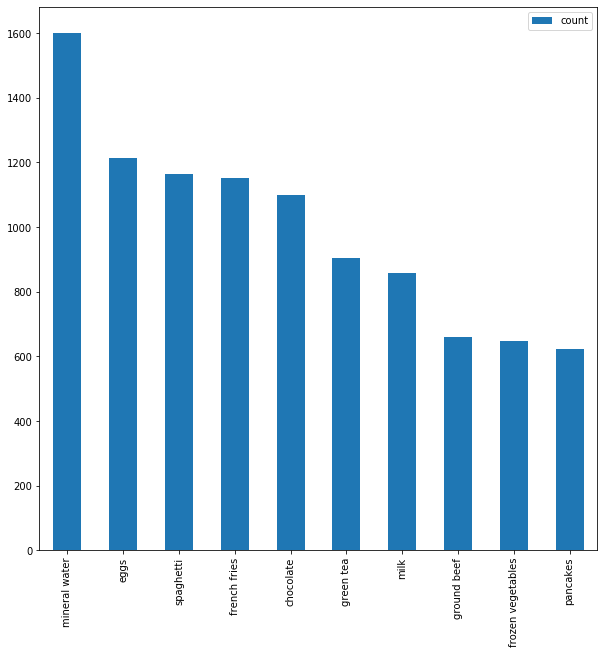

In [9]:
example.plot(name='bar') # most bought products(top 10)

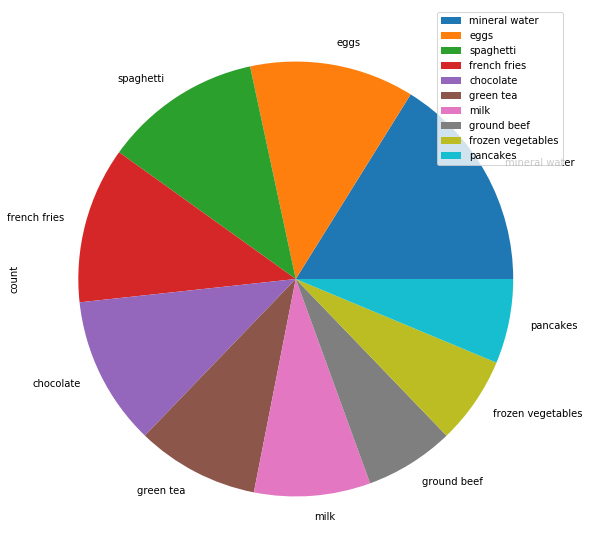

In [10]:
example.plot() #pie chart(top 10)

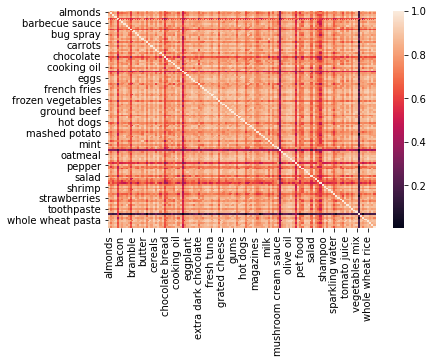

In [11]:
example.plot(name='heatmap') #correaltion heatmap(for products bought in pair)

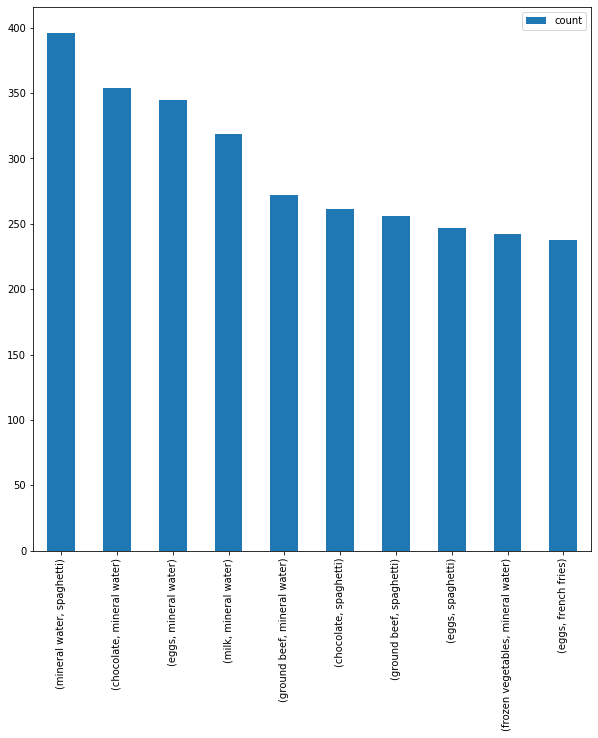

In [12]:
example.plot(name='comb bar')#bar plot for 10 most frequent pair

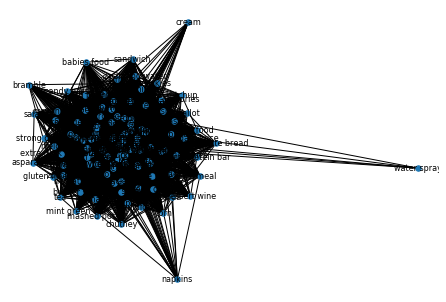

In [13]:
example.plot(name='network') #network graph for showing products bought in pairs

### Attack 3

In [14]:
example.top(comb=True) #most frequent pair

,count
"(mineral water, spaghetti)",396


In [15]:
example.top(least=True) #least purchased

,count
water spray,3


### Attack 4

In [16]:
example.format_x(train_x) #transforming into 'unified format'

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
example.format_y(train_y) #transforming into 'unified format'

[53,
 114,
 60,
 30,
 86,
 24,
 96,
 71,
 1,
 114,
 53,
 109,
 45,
 16,
 36,
 48,
 50,
 14,
 58,
 42,
 106,
 14,
 48,
 20,
 115,
 42,
 52,
 14,
 24,
 50,
 99,
 29,
 109,
 14,
 45,
 48,
 24,
 71,
 81,
 29,
 42,
 71,
 24,
 109,
 99,
 45,
 21,
 24,
 50,
 96,
 56,
 45,
 15,
 109,
 84,
 109,
 48,
 37,
 113,
 114,
 71,
 50,
 107,
 48,
 14,
 79,
 50,
 99,
 38,
 107,
 50,
 100,
 48,
 56,
 99,
 91,
 88,
 74,
 107,
 24,
 79,
 14,
 71,
 68,
 71,
 83,
 16,
 71,
 14,
 14,
 99,
 71,
 82,
 39,
 107,
 98,
 20,
 70,
 99,
 88,
 53,
 42,
 70,
 4,
 48,
 109,
 71,
 37,
 48,
 3,
 24,
 24,
 107,
 36,
 29,
 80,
 56,
 24,
 37,
 42,
 114,
 107,
 82,
 63,
 14,
 42,
 24,
 36,
 99,
 22,
 14,
 58,
 109,
 107,
 109,
 58,
 71,
 45,
 42,
 53,
 81,
 71,
 70,
 44,
 96,
 48,
 109,
 109,
 107,
 58,
 36,
 54,
 96,
 14,
 71,
 36,
 114,
 21,
 88,
 71,
 14,
 72,
 91,
 48,
 14,
 29,
 88,
 74,
 99,
 42,
 98,
 8,
 71,
 99,
 14,
 71,
 29,
 14,
 16,
 16,
 47,
 114,
 48,
 88,
 24,
 42,
 98,
 50,
 24,
 48,
 48,
 96,
 14,
 81,
 29,
 

In [18]:
example.get_labels() #number on 'unified format' of 'y' corresponds to following internal list of labels

['almonds',
 'antioxydant juice',
 'asparagus',
 'avocado',
 'babies food',
 'bacon',
 'barbecue sauce',
 'black tea',
 'blueberries',
 'body spray',
 'bramble',
 'brownies',
 'bug spray',
 'burger sauce',
 'burgers',
 'butter',
 'cake',
 'candy bars',
 'carrots',
 'cauliflower',
 'cereals',
 'champagne',
 'chicken',
 'chili',
 'chocolate',
 'chocolate bread',
 'chutney',
 'cider',
 'clothes accessories',
 'cookies',
 'cooking oil',
 'corn',
 'cottage cheese',
 'cream',
 'dessert wine',
 'eggplant',
 'eggs',
 'energy bar',
 'energy drink',
 'escalope',
 'extra dark chocolate',
 'flax seed',
 'french fries',
 'french wine',
 'fresh bread',
 'fresh tuna',
 'fromage blanc',
 'frozen smoothie',
 'frozen vegetables',
 'gluten free bar',
 'grated cheese',
 'green beans',
 'green grapes',
 'green tea',
 'ground beef',
 'gums',
 'ham',
 'hand protein bar',
 'herb & pepper',
 'honey',
 'hot dogs',
 'ketchup',
 'light cream',
 'light mayo',
 'low fat yogurt',
 'magazines',
 'mashed potato',
 'ma

### Attack 5

In [19]:
x_train, x_test, y_train, y_test = train_test_split(example.format_x(train_x), example.format_y(train_y))

#mahcine learning in case of DecisionTree(default)
example.fit(x_train, y_train, formatted=True)

In [20]:
pred = example.predict(x_test)

In [21]:
example.predict(x_test, tostring=True)

['cookies',
 'mineral water',
 'eggs',
 'cookies',
 'avocado',
 'avocado',
 'fresh tuna',
 'frozen vegetables',
 'ground beef',
 'grated cheese',
 'frozen vegetables',
 'spaghetti',
 'shrimp',
 'turkey',
 'cookies',
 'milk',
 'eggs',
 'eggs',
 'cookies',
 'burgers',
 'mineral water',
 'cookies',
 'cookies',
 'eggs',
 'shrimp',
 'cookies',
 'cookies',
 'spaghetti',
 'burgers',
 'pancakes',
 'milk',
 'chocolate',
 'chutney',
 'french fries',
 'flax seed',
 'herb & pepper',
 'mineral water',
 'mineral water',
 'turkey',
 'whole wheat rice',
 'shrimp',
 'grated cheese',
 'turkey',
 'burgers',
 'burgers',
 'cookies',
 'pancakes',
 'chicken',
 'tomatoes',
 'shrimp',
 'cookies',
 'turkey',
 'shrimp',
 'energy bar',
 'burgers',
 'herb & pepper',
 'grated cheese',
 'shrimp',
 'cake',
 'eggs',
 'turkey',
 'cookies',
 'cookies',
 'avocado',
 'french fries',
 'cookies',
 'chocolate',
 'energy bar',
 'frozen vegetables',
 'antioxydant juice',
 'cookies',
 'cookies',
 'cookies',
 'cookies',
 'eggs',

In [22]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         2
          14       0.17      0.20      0.19       115
          15       0.00      0.00      0.00        13
          16       0.09      0.13      0.11        23
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         8
          21       0.07      0.06      0.06        17
          22       0.00    

/home/dg/envs/ds/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dg/envs/ds/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
#"real prediction"
real = [] #array keeing 'real' predictions
example.fit(train_x, train_y, formatted=False)
real.append(example.predict(test_x.drop(columns=[0]), formatted=False, tostring=True))
real[-1]

['cookies',
 'frozen vegetables',
 'burger sauce',
 'cookies',
 'chocolate',
 'cookies',
 'herb & pepper',
 'mineral water',
 'cookies',
 'eggs',
 'burgers',
 'butter',
 'burgers',
 'grated cheese',
 'cookies',
 'spaghetti',
 'cookies',
 'eggs',
 'turkey',
 'chocolate',
 'mineral water',
 'cookies',
 'tomatoes',
 'frozen vegetables',
 'spaghetti',
 'flax seed',
 'fresh tuna',
 'grated cheese',
 'chocolate',
 'chocolate',
 'spaghetti',
 'mineral water',
 'burgers',
 'tomatoes',
 'eggs',
 'turkey',
 'frozen vegetables',
 'burgers',
 'soup',
 'cake',
 'mineral water',
 'mineral water',
 'frozen vegetables',
 'cookies',
 'chili',
 'cookies',
 'shrimp',
 'mineral water',
 'herb & pepper',
 'eggs',
 'grated cheese',
 'cake',
 'turkey',
 'cookies',
 'frozen vegetables',
 'cookies',
 'burgers',
 'mineral water',
 'chocolate',
 'herb & pepper',
 'cake',
 'cookies',
 'cookies',
 'chicken',
 'grated cheese',
 'spaghetti',
 'cookies',
 'cookies',
 'cookies',
 'turkey',
 'burgers',
 'cookies',
 'mi

In [24]:
#LogisticRegreesion example
example = Engine(data=train_x.join(train_y.rename(columns={0:19})), model="Logistic")

example.fit(x_train, y_train, formatted=True)
pred = example.predict(x_test, tostring=True)
print(classification_report(y_test, example.predict(x_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         2
          14       0.23      0.29      0.25       115
          15       0.00      0.00      0.00        13
          16       0.17      0.04      0.07        23
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         8
          21       0.00      0.00      0.00        17
          22       0.00      0.00      0.00         8
          23       0.00    

/home/dg/envs/ds/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
#"real prediction"
example.fit(train_x, train_y, formatted=False)
real.append(example.predict(test_x.drop(columns=[0]), formatted=False, tostring=True))
real[-1]

/home/dg/envs/ds/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


['cookies',
 'frozen vegetables',
 'chocolate',
 'escalope',
 'grated cheese',
 'cookies',
 'frozen vegetables',
 'mineral water',
 'cookies',
 'eggs',
 'mineral water',
 'mineral water',
 'spaghetti',
 'herb & pepper',
 'cookies',
 'spaghetti',
 'cookies',
 'eggs',
 'mineral water',
 'whole wheat pasta',
 'milk',
 'cookies',
 'ground beef',
 'burgers',
 'burgers',
 'mineral water',
 'ground beef',
 'red wine',
 'cookies',
 'turkey',
 'spaghetti',
 'milk',
 'spaghetti',
 'herb & pepper',
 'eggs',
 'shrimp',
 'frozen vegetables',
 'chocolate',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'frozen vegetables',
 'cookies',
 'spaghetti',
 'cookies',
 'frozen vegetables',
 'mineral water',
 'tomatoes',
 'mineral water',
 'milk',
 'eggs',
 'herb & pepper',
 'cookies',
 'frozen vegetables',
 'cookies',
 'burgers',
 'mineral water',
 'chocolate',
 'red wine',
 'eggs',
 'cookies',
 'cookies',
 'french fries',
 'burgers',
 'mineral water',
 'cookies',
 'cookies',
 'min

In [26]:
#KNN example
example = Engine(data=train_x.join(train_y.rename(columns={0:19})), model="KNN")

example.fit(x_train, y_train, formatted=True)
pred = example.predict(x_test, tostring=True)
print(classification_report(y_test, example.predict(x_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         2
          14       0.06      0.33      0.10       115
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00        23
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         8
          21       0.00    

/home/dg/envs/ds/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dg/envs/ds/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
#"real prediction"
example.fit(train_x, train_y, formatted=False)
real.append(example.predict(test_x.drop(columns=[0]), formatted=False, tostring=True))
real[-1]

['escalope',
 'burgers',
 'burger sauce',
 'escalope',
 'herb & pepper',
 'escalope',
 'herb & pepper',
 'cake',
 'escalope',
 'cake',
 'mineral water',
 'mineral water',
 'burgers',
 'turkey',
 'escalope',
 'fresh tuna',
 'escalope',
 'mineral water',
 'burgers',
 'burgers',
 'chocolate',
 'escalope',
 'fresh tuna',
 'burgers',
 'mineral water',
 'mineral water',
 'cooking oil',
 'shrimp',
 'burgers',
 'turkey',
 'spaghetti',
 'avocado',
 'burgers',
 'tomatoes',
 'cake',
 'shrimp',
 'tomatoes',
 'burgers',
 'brownies',
 'almonds',
 'burgers',
 'mineral water',
 'tomatoes',
 'escalope',
 'chocolate',
 'escalope',
 'frozen vegetables',
 'mineral water',
 'burgers',
 'eggs',
 'eggs',
 'chocolate',
 'burgers',
 'escalope',
 'chocolate',
 'escalope',
 'burgers',
 'mineral water',
 'chocolate',
 'ground beef',
 'chocolate',
 'escalope',
 'escalope',
 'mineral water',
 'grated cheese',
 'eggs',
 'escalope',
 'escalope',
 'mineral water',
 'ground beef',
 'cottage cheese',
 'escalope',
 'mine

In [28]:
#Neural Net example
example = Engine(data=train_x.join(train_y.rename(columns={0:19})), model="Neural")

example.fit(x_train, y_train, formatted=True)
pred = example.predict(x_test, tostring=True)
print(classification_report(y_test, example.predict(x_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         2
          14       0.00      0.00      0.00       115
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00        23
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         8
          21       0.00      0.00      0.00        17
          22       0.00      0.00      0.00         8
          23       0.00    

/home/dg/envs/ds/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#"real prediction"
example.fit(train_x, train_y, formatted=False)
real.append(example.predict(test_x.drop(columns=[0]), formatted=False, tostring=True))
real[-1]

['mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral water',
 'mineral 

## According to classification reports, 'LogisticRegressionClassifier'seems to be best-working.

### Attack 6

In [ ]:
#Saving the result of LogisticRegression(in real[1]) as  CSV format
example.to_csv(name='final_prediction', pred=real[1])